# HW04
## Yun Cheng
### USC ID: 5013-2324-78

## Question1
### (a)
Download the Communities and Crime data from
https://archive.ics.uci.
edu/ml/datasets/Communities+and+Crime
. Use the first 1495 rows of data as
the training set and the rest as the test set.

### (b)
The data set has missing values. Use a data imputation technique to deal with
the missing values in the data set. The data description mentions some features
are nonpredictive. Ignore those features.

 Here we use univariate alogrithm imputes values in the i-th feature dimension using only non-missing values in that feature dimension. The strategy is using mean values.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv('./communities.csv')
data = data.replace('?', np.nan)

In [4]:
data_column=["state","county","community","communityname","fold","population","householdsize","racepctblack","racePctWhite","racePctAsian","racePctHisp","agePct12t21","agePct12t29","agePct16t24","agePct65up","numbUrban","pctUrban","medIncome","pctWWage","pctWFarmSelf","pctWInvInc","pctWSocSec","pctWPubAsst","pctWRetire","medFamInc","perCapInc","whitePerCap","blackPerCap","indianPerCap","AsianPerCap","OtherPerCap","HispPerCap","NumUnderPov","PctPopUnderPov","PctLess9thGrade","PctNotHSGrad","PctBSorMore","PctUnemployed","PctEmploy","PctEmplManu","PctEmplProfServ","PctOccupManu","PctOccupMgmtProf","MalePctDivorce","MalePctNevMarr","FemalePctDiv","TotalPctDiv","PersPerFam","PctFam2Par","PctKids2Par","PctYoungKids2Par","PctTeen2Par","PctWorkMomYoungKids","PctWorkMom","NumIlleg","PctIlleg","NumImmig","PctImmigRecent","PctImmigRec5","PctImmigRec8","PctImmigRec10","PctRecentImmig","PctRecImmig5","PctRecImmig8","PctRecImmig10","PctSpeakEnglOnly","PctNotSpeakEnglWell","PctLargHouseFam","PctLargHouseOccup","PersPerOccupHous","PersPerOwnOccHous","PersPerRentOccHous","PctPersOwnOccup","PctPersDenseHous","PctHousLess3BR","MedNumBR","HousVacant","PctHousOccup","PctHousOwnOcc","PctVacantBoarded","PctVacMore6Mos","MedYrHousBuilt","PctHousNoPhone","PctWOFullPlumb","OwnOccLowQuart","OwnOccMedVal","OwnOccHiQuart","RentLowQ","RentMedian","RentHighQ","MedRent","MedRentPctHousInc","MedOwnCostPctInc","MedOwnCostPctIncNoMtg","NumInShelters","NumStreet","PctForeignBorn","PctBornSameState","PctSameHouse85","PctSameCity85","PctSameState85","LemasSwornFT","LemasSwFTPerPop","LemasSwFTFieldOps","LemasSwFTFieldPerPop","LemasTotalReq","LemasTotReqPerPop","PolicReqPerOffic","PolicPerPop","RacialMatchCommPol","PctPolicWhite","PctPolicBlack","PctPolicHisp","PctPolicAsian","PctPolicMinor","OfficAssgnDrugUnits","NumKindsDrugsSeiz","PolicAveOTWorked","LandArea","PopDens","PctUsePubTrans","PolicCars","PolicOperBudg","LemasPctPolicOnPatr","LemasGangUnitDeploy","LemasPctOfficDrugUn","PolicBudgPerPop","ViolentCrimesPerPop"]
data.columns=data_column
data = data.replace('?', np.nan)
#Drop non-predictive columns
non_predictive=['state','county','community','communityname','fold']
data=data.drop(columns=non_predictive)

In [5]:
data_missing=data.isnull().sum()
data_missing

population                 0
householdsize              0
racepctblack               0
racePctWhite               0
racePctAsian               0
racePctHisp                0
agePct12t21                0
agePct12t29                0
agePct16t24                0
agePct65up                 0
numbUrban                  0
pctUrban                   0
medIncome                  0
pctWWage                   0
pctWFarmSelf               0
pctWInvInc                 0
pctWSocSec                 0
pctWPubAsst                0
pctWRetire                 0
medFamInc                  0
perCapInc                  0
whitePerCap                0
blackPerCap                0
indianPerCap               0
AsianPerCap                0
OtherPerCap                1
HispPerCap                 0
NumUnderPov                0
PctPopUnderPov             0
PctLess9thGrade            0
                        ... 
PctSameHouse85             0
PctSameCity85              0
PctSameState85             0
LemasSwornFT  

In [6]:
#Ciatation : https://scikit-learn.org/stable/modules/impute.html
#Replace NaN data with mean values of each feature
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
data_temp=imp.fit(data).transform(data)
data_filtered=pd.DataFrame(data=data_temp)
data_newcol = [item for item in data_column if item not in non_predictive] 
data_filtered.columns=data_newcol

In [7]:
train_data=data_filtered.iloc[:1495,:]
test_data=data_filtered.iloc[:data.shape[0]-1495,:]

### (c)
Plot a correlation matrix for the features in the data set

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
corrMatrix=data_filtered.corr()
fig = plt.figure(figsize=(20, 15))
sns.heatmap(corrMatrix, annot=False,cmap=sns.color_palette("YlGnBu"))
plt.show()

<Figure size 2000x1500 with 2 Axes>

### (d)
Calculate the Coefficient of Variation
CV
for each feature, where
CV
=
s/m
, in
which
s
is sample standard deviation and
m
is sample mean.

In [9]:
data_mean=data_filtered.mean(axis = 0) 
data_std=data_filtered.std(axis = 0) 
CV=data_std/data_mean
CV_sort = pd.Series.sort_values(CV, ascending=False)
print('The Coefficient of Variation of CV for each feature are:')
CV_sort

The Coefficient of Variation of CV for each feature are:


NumStreet               4.406541
NumInShelters           3.486974
NumIlleg                2.995100
NumImmig                2.901222
LemasPctOfficDrugUn     2.558424
NumUnderPov             2.306038
population              2.205998
numbUrban               2.003814
HousVacant              1.960592
LandArea                1.679054
racePctHisp             1.614824
PctNotSpeakEnglWell     1.458930
PctUsePubTrans          1.417187
racepctblack            1.410505
racePctAsian            1.359345
PctRecentImmig          1.299953
PctRecImmig5            1.297483
PctRecImmig10           1.283932
PctRecImmig8            1.281127
PctPersDenseHous        1.127131
PctForeignBorn          1.072276
PctVacantBoarded        1.064471
ViolentCrimesPerPop     0.979176
PctIlleg                0.919778
PctHousNoPhone          0.918164
OwnOccMedVal            0.878825
OwnOccHiQuart           0.874776
PopDens                 0.872453
PctWOFullPlumb          0.848468
OwnOccLowQuart          0.848013
          

### (e)
Pick
b
√
128
features with highest
CV
, and make scatter plots and box plots for
them. Can you draw conclusions about significance of those features, just by the
scatter plots?

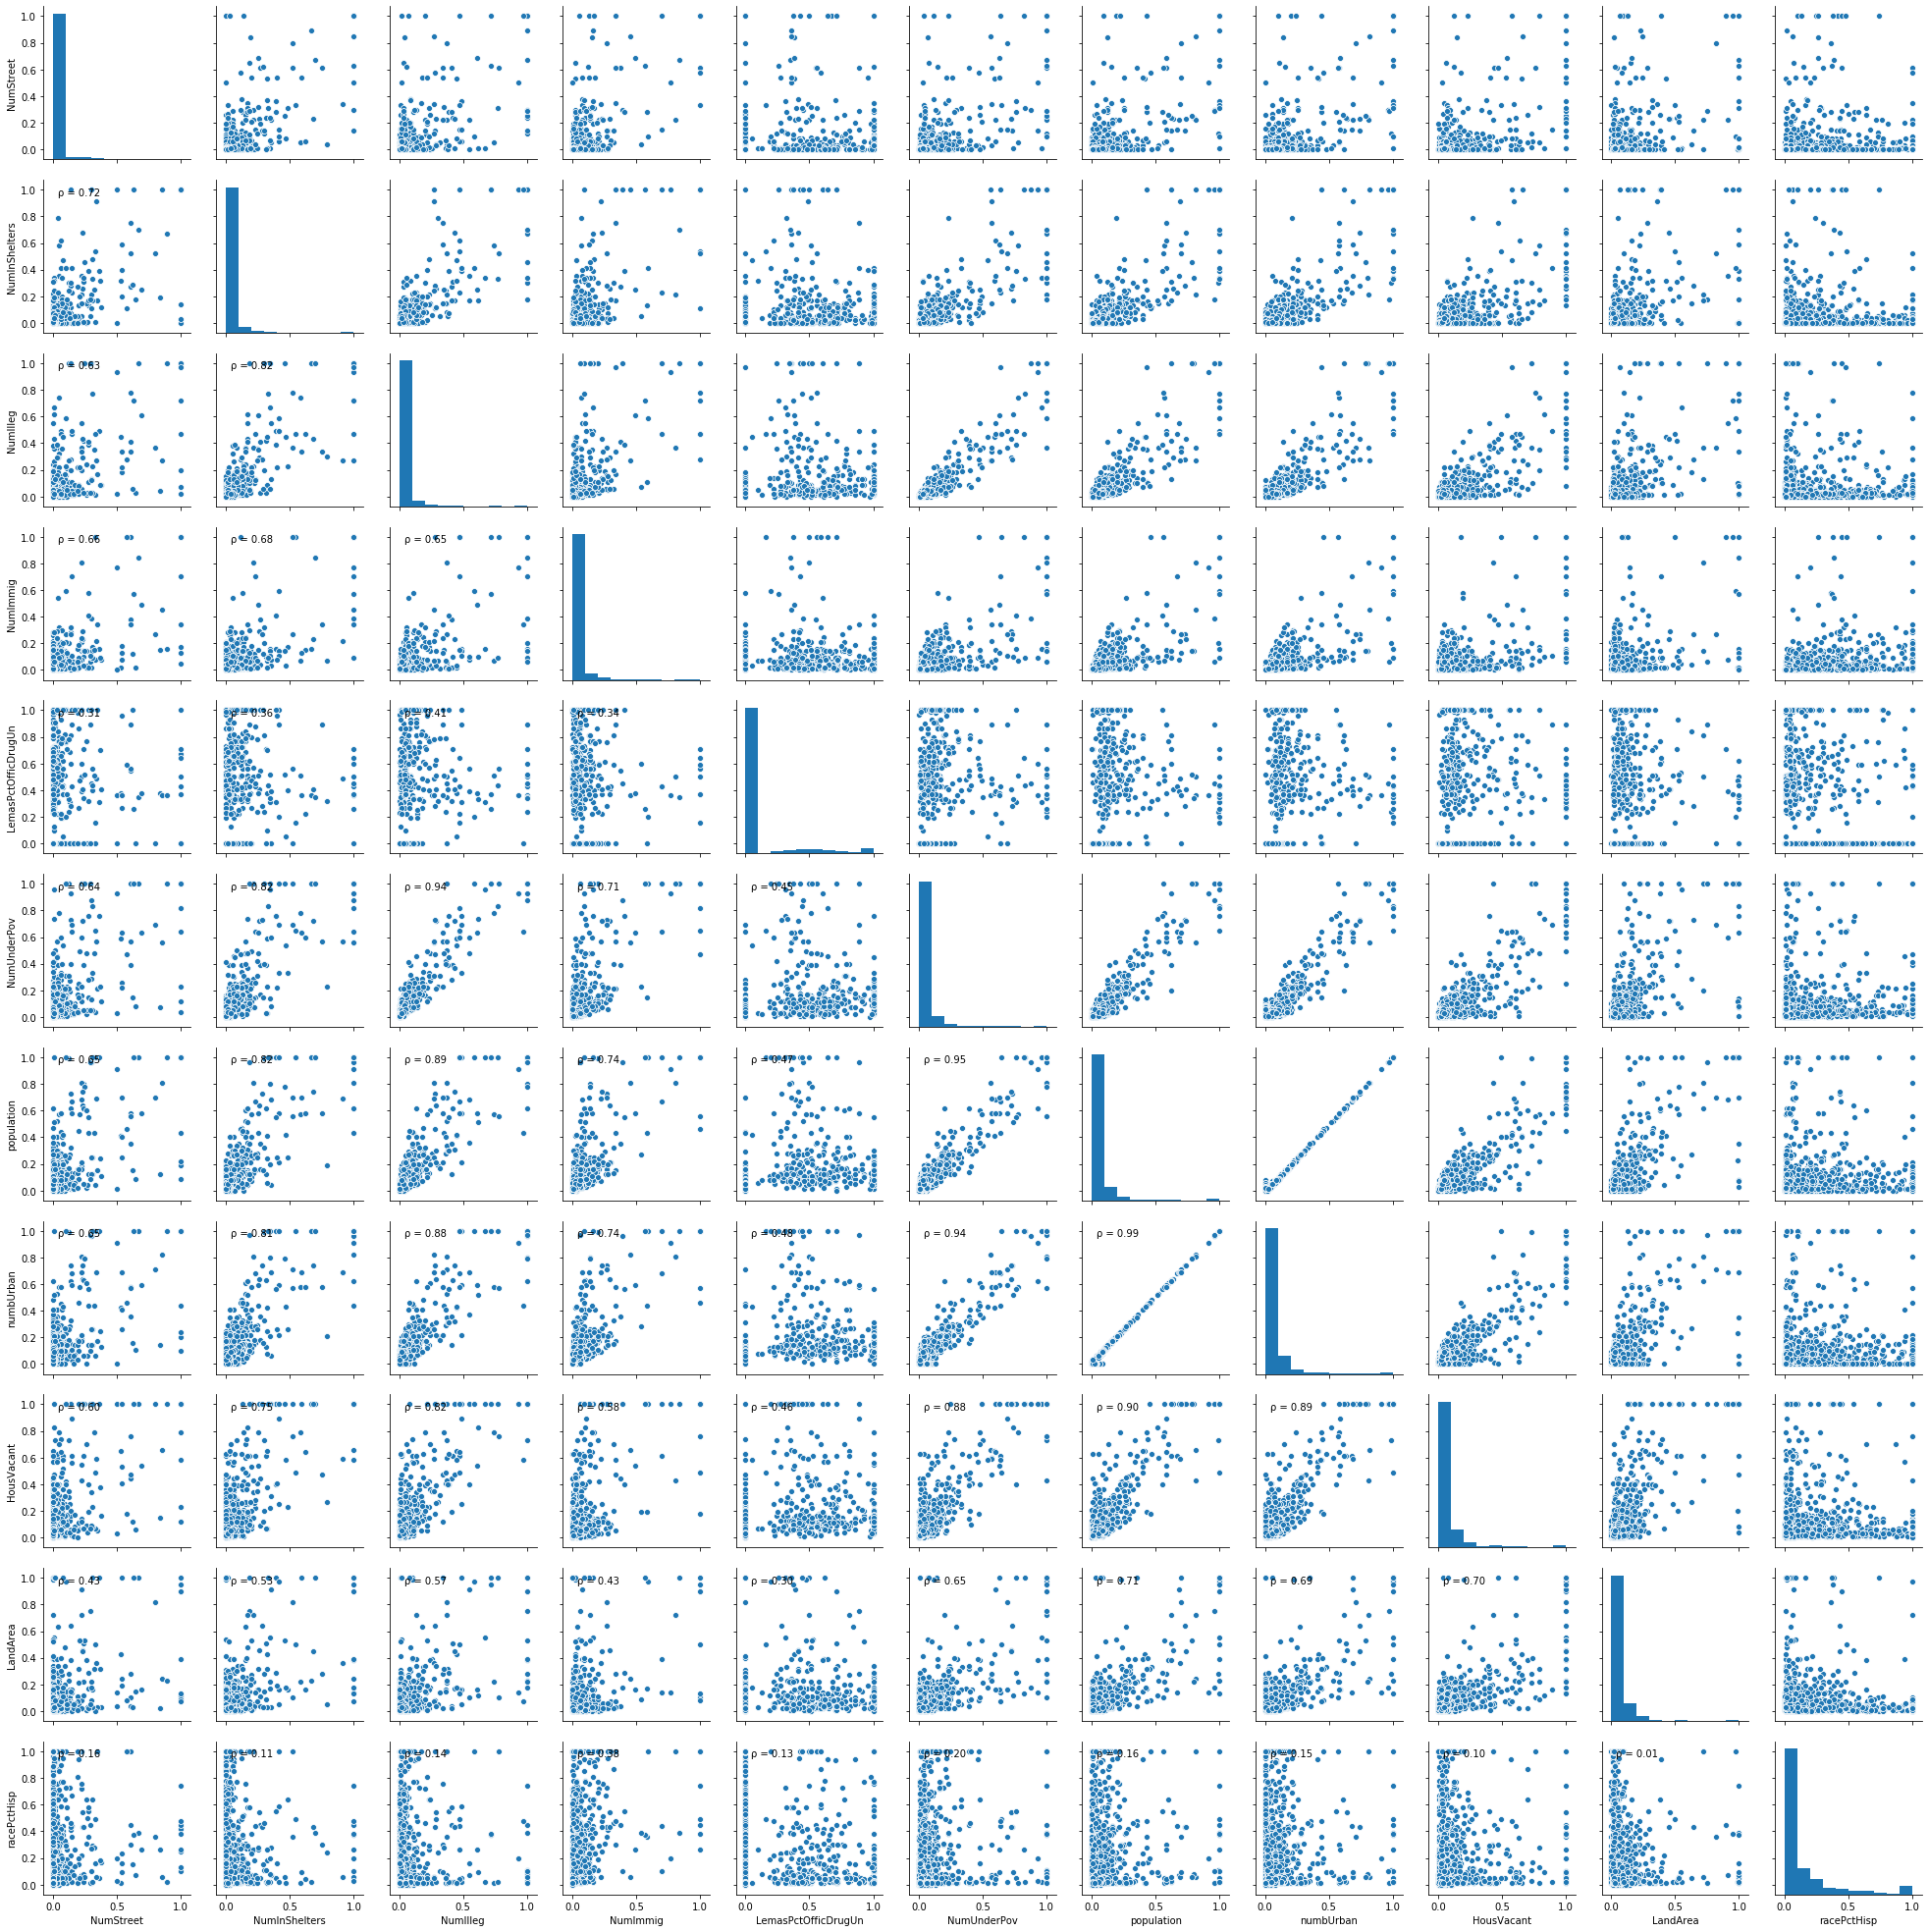

In [10]:
#Citation: https://stackoverflow.com/questions/50832204/show-correlation-values-in-pairplot-using-seaborn-in-python
from math import sqrt, floor
from scipy.stats import pearsonr
number_features = floor(sqrt(128))
Sort=CV_sort[:number_features]
Sort_column_name=list(Sort.index)
e_data=data_filtered[Sort_column_name]
g=sns.pairplot(e_data)
def correlation(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
g.map_lower(correlation) 

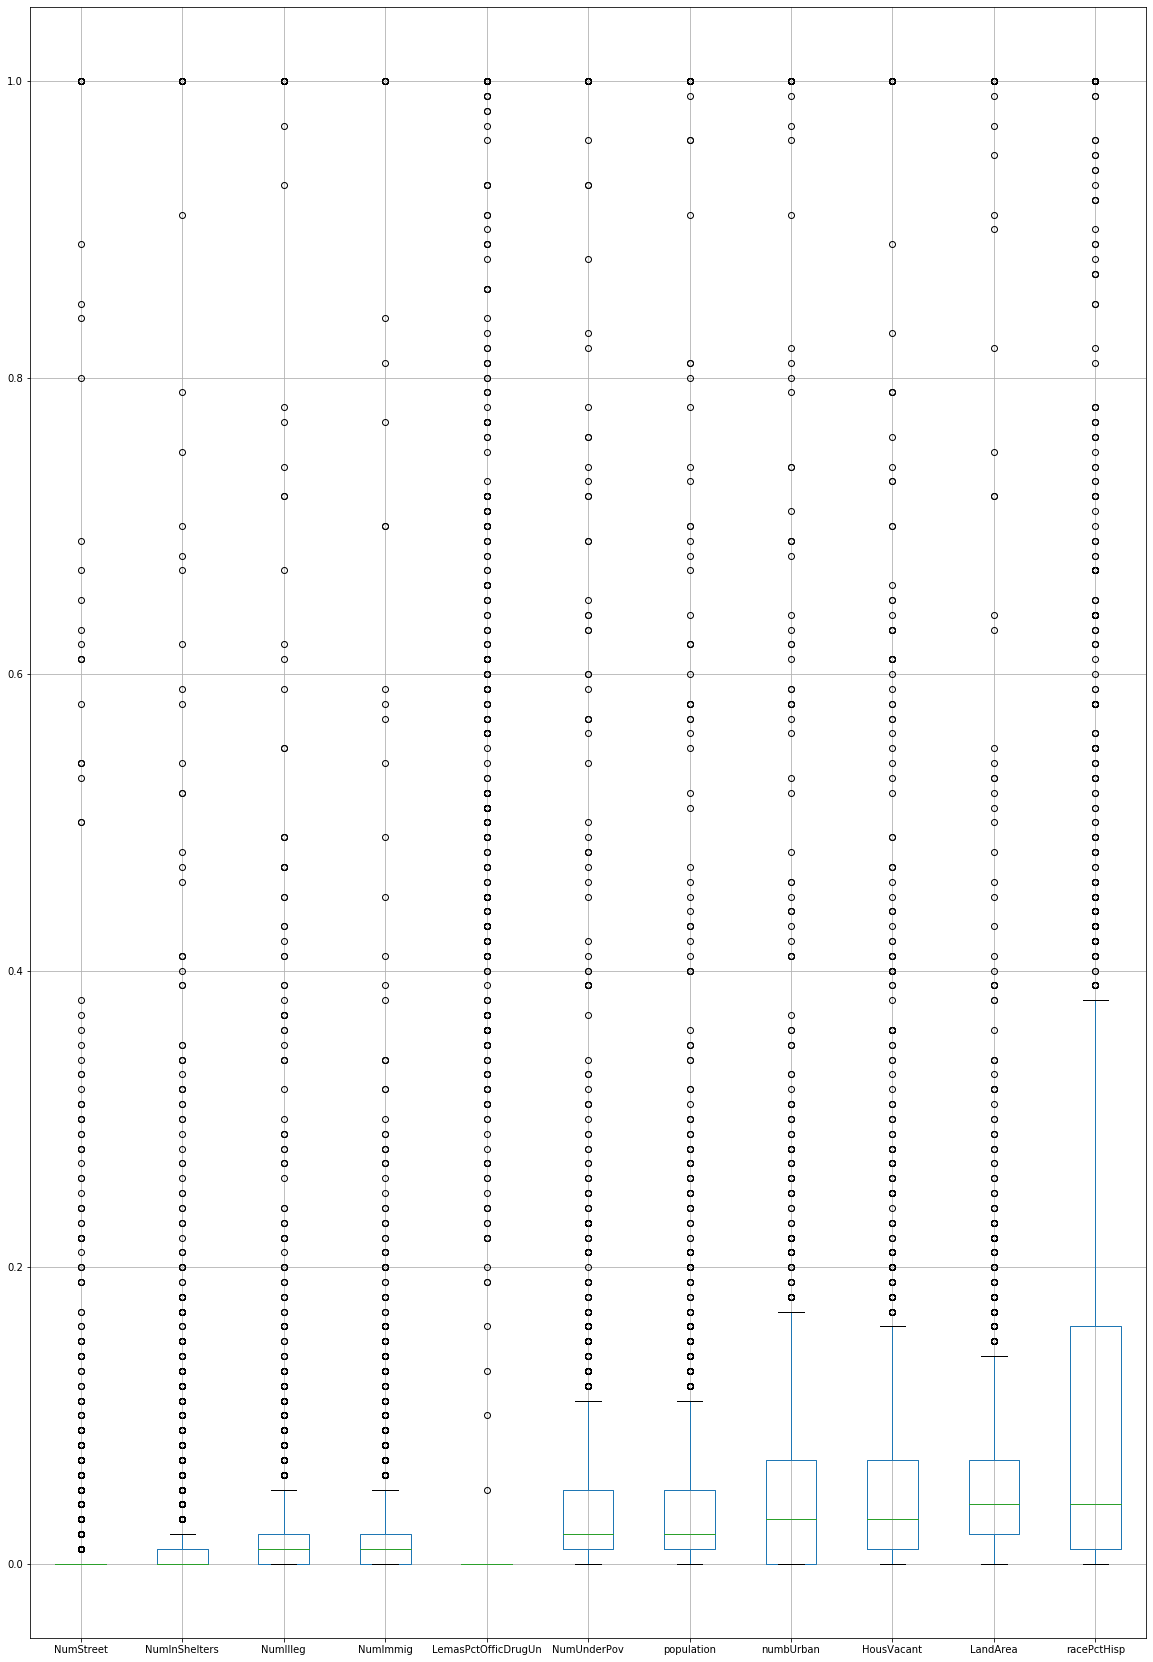

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 30))
gs=data_filtered.boxplot(Sort_column_name)

Higher Coefficient of Variation of CV represents either relatively big std or relatively small mean. By Scatter plot, we can get some of the sense for the std of each feature,however,we are not able to directly see the mean. By boxplot, we can make conclusion that "NumStreet" has realtively small mean, which contribute its Coefficient of Variation of CV becomes higher.

### (f) 
Fit a linear model using least squares to the training set and report the test error.

In [12]:
#ViolentCrimesPerPop is the output Y, others are Predictors X
X_train=train_data.iloc[:,:-1]
Y_train=train_data.iloc[:,-1]
X_test=test_data.iloc[:,:-1]
Y_test=test_data.iloc[:,-1]

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
linearRegression=LinearRegression()
linearRegression.fit(X_train,Y_train)
Y_test_predict = linearRegression.predict(X_test)
Test_linear_error=mean_squared_error(Y_test, Y_test_predict)
print('Linear least squares error is:'+ str(Test_linear_error))

Linear least squares error is:0.02014793107672362


### (g) 
Fit a ridge regression model on the training set, with
λ
chosen by cross-validation.
Report the test error obtained

Here we use RidgeRegressionCV ,which is Ridge regression with built-in cross-validation.

In [14]:
#Citation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html
from sklearn.linear_model import RidgeCV
ridgeCV = RidgeCV().fit(X_train, Y_train)
Y_test_predict = ridgeCV.predict(X_test)
Test_ridge_error=mean_squared_error(Y_test, Y_test_predict)
print('Ridge regression error is:'+ str(Test_ridge_error))

Ridge regression error is:0.02077762189482602


### (h)
Fit a LASSO model on the training set, with
λ
chosen by cross-validation. Report
the test error obtained, along with a list of the variables selected by the model.
Repeat with standardized
features. Report the test error for both cases and
compare them

Here we use LassoCV ,which is Lasso regression with built-in cross-validation.

In [15]:
#Citation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html
#Non standardized:
from sklearn.linear_model import LassoCV
LassoCV = LassoCV().fit(X_train, Y_train)
Y_test_lasso_predict = LassoCV.predict(X_test)
Test_lasso_error=mean_squared_error(Y_test, Y_test_lasso_predict)
print('lasso regression error is:'+ str(Test_lasso_error))

lasso regression error is:0.02112467186536344


In [16]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(estimator=LassoCV,prefit=True)
selector.transform(X_train)
# When using Lasso as estimator,the default threshold for selection is 1e-5
Select_index=list(selector.get_support(indices=True))
selected_feature=[]
for index in Select_index:
    selected_feature.append(train_data.columns[index])
print('selected features by Lasso are:',selected_feature)

selected features by Lasso are: ['racepctblack', 'racePctAsian', 'agePct12t21', 'agePct12t29', 'agePct65up', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade', 'PctEmploy', 'PctEmplManu', 'PctOccupManu', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRec10', 'PctRecImmig10', 'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'RentLowQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSam

In [17]:
#Standardized data:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_std=scaler.fit_transform(train_data)
test_std=scaler.fit_transform(test_data)
X_train_std=train_std[:,:-1]
Y_train_std=train_std[:,-1]
X_test_std=test_std[:,:-1]
Y_test_std=test_std[:,-1]

In [18]:
from sklearn.linear_model import LassoCV
LassoCV_std = LassoCV().fit(X_train_std, Y_train_std)
Y_test_lasso_predict_std = LassoCV_std.predict(X_test_std)
Test_lasso_error_std=mean_squared_error(Y_test_std, Y_test_lasso_predict_std)
print('Standardized lasso regression error is:'+ str(Test_lasso_error_std))

Standardized lasso regression error is:0.3560745732305054


My standardzied data rises the error rate. One of the reason to explain is that the original data is normalized, standardarizing normalizied data might cause potential risk of rising the error. 

### (i)
Fit a PCR model on the training set, with
M
(the number of principal components) chosen by cross-validation. Report the test error obtained

In [19]:
#Citation: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab11-py.html
from sklearn.decomposition import PCA
from sklearn import model_selection
for M in range(1, X_train.shape[1]):
    pca = PCA(n_components=M)

In [20]:
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)
mse = []
regr = LinearRegression()
for M in range(1, X_train.shape[1]):
    pca = PCA(n_components=M)
    X_train_reduction = pca.fit_transform(X_train)
    score = -1*model_selection.cross_val_score(regr, X_train_reduction, Y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
print('The best M is:',np.argsort(mse)[0])

The best M is: 95


In [21]:
# Use M=95 for test data set
pca_opti = PCA(n_components=95)
X_test_reduction = pca_opti.fit_transform(X_test)
X_train_reduction_opti = pca_opti.fit_transform(X_train)
# Train regression model on dimension reduced training data 
regr = LinearRegression()
regr.fit(X_train_reduction_opti, Y_train)
## Prediction with reduced test data
Y_test_predict_opti=regr.predict(X_test_reduction)
mse_opti=mean_squared_error(Y_test, Y_test_predict_opti)
print('The MSE of the best M is:',mse_opti)

The MSE of the best M is: 0.03952826873015869


### (j)
In this section, we would like to fit a boosting tree to the data. As in classification
trees, one can use any type of regression at each node to build a multivariate
regression tree. Because the number of variables is large in this problem, one
can use
L
1
-penalized regression at each node. Such a tree is called
L
1
penalized
gradient boosting tree. You can use XGBoost
to fit the model tree. Determine
α
(the regularization term) using cross-validation

In [22]:
#Citation: https://campus.datacamp.com/courses/extreme-gradient-boosting-with-xgboost/regression-with-xgboost?ex=7
import xgboost as xgb
dtrain = xgb.DMatrix(data=X_train, label=Y_train)
params={'objective':'reg:squarederror','max_depth':4}
L1_alpha=[0.00001,0.0001,0.001,0.01,0.1,1,10]
rmse_L1=[]
for reg in L1_alpha:
        params['alpha']=reg
        cv_result= xgb.cv(dtrain=dtrain,params=params,nfold=5,num_boost_round=10,metrics ='rmse',seed=1)
        rmse_L1.append(cv_result['test-rmse-mean'])
rmse=[]
for i in range(len(L1_alpha)):
    rmse.append(rmse_L1[i][0])#Pick the highest rmse for each round

In [23]:
summary_J=pd.DataFrame()
summary_J['alpha']=L1_alpha
summary_J['rmse']=rmse
summary_J

,alpha,rmse
0,0.00001,0.270539
1,0.00010,0.270539
2,0.00100,0.270540
3,0.01000,0.270552
4,0.10000,0.270251
5,1.00000,0.270486
6,10.00000,0.277884


When alpha = 0.1 ,it gives smallest rmse which is 0.270251

# Continuing to HW04 Part2.ipynb for more anwsers